# Starter code for the Outliers Mini-Project

In [42]:
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt

## Load up some practice data with outliers in it

In [43]:
with open('practice_outliers_ages.pkl', 'rb') as f:
    ages = pickle.load(f)
    
with open('practice_outliers_net_worths.pkl', 'rb') as f:
    net_worths = pickle.load(f)

- ages and net_worths need to be reshaped into 2D numpy arrays
- second argument of reshape command is a tuple of integers: `(n_rows, n_columns)`
- by convention, `n_rows` is the number of data points
- and `n_columns` is the number of features

In [44]:
from sklearn.model_selection import train_test_split

ages = np.reshape(np.array(ages), (len(ages), 1))
net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

## ↓↓↓ Your Code Goes Here ↓↓↓

Fill in a regression here!  Name the regression object `reg` so that the plotting code below works, and you can see what your regression looks like

In [45]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
print("Slope: {}".format(reg.coef_))
print("Score: {}".format(reg.score(ages_test, net_worths_test)))

Slope: [[5.07793064]]
Score: 0.8782624703664675


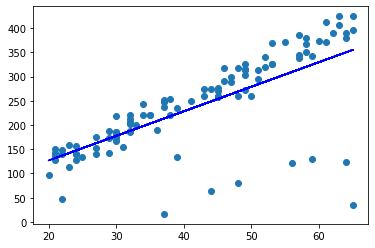

In [46]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

## Identify and remove the most outlier-y points

In [47]:
def outlier_cleaner(predictions, ages, net_worths):
    """Clean away the 10% of points that have the largest
    residual errors (difference between the prediction
    and the actual net worth).

    Return a list of tuples named cleaned_data where
    each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []

    #=== Your Code Goes Here ===#
    def createTuplesWithError(index_prediction):
        (index, prediction) = index_prediction
        error = prediction - net_worths[index]
        return (ages[index][0], net_worths[index][0], error[0])

    tuples = list(map(createTuplesWithError, enumerate(predictions)))
    tuples = sorted(tuples, key=lambda tuple: tuple[2])

    ninety_percent = int(len(predictions)*0.9)  
    cleaned_data = tuples[0:ninety_percent]
    print("➡ cleaned_data :", cleaned_data)

    return cleaned_data

In [48]:
cleaned_data = []

try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlier_cleaner(predictions, ages_train, net_worths_train)
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")

➡ cleaned_data : [(63, 424.51073132931936, -79.39107924694724), (61, 412.83425631014785, -77.87046551465625), (53, 368.29556369017877, -73.95521804220931), (57, 385.5629753784311, -70.9109071567006), (65, 424.5580423540415, -69.28252898478888), (55, 370.8748005714165, -66.3785936365665), (58, 378.75051644788397, -59.02051758271324), (46, 317.0578808948303, -58.26304975094263), (49, 326.86999044991904, -52.841367375710604), (52, 339.7693315999082, -50.50691659537898), (48, 318.62560238232396, -49.674909951555776), (62, 389.24094136476344, -49.199219925831585), (58, 366.6772719000951, -46.947273034924365), (34, 243.79287311628013, -45.93320969367559), (60, 374.28347921780096, -44.39761906574961), (65, 396.6665152430942, -41.39100187384156), (30, 217.96059712816052, -40.41265627931699), (49, 313.12236579136925, -39.09374271716081), (64, 389.1123455094963, -38.914762783683955), (37, 250.76090254244718, -37.66744718952185), (47, 300.0349466519055, -36.16218486457757), (38, 253.9380500875044

**Only run this code if `cleaned_data` is returning data**

➡ new slope : [[6.36859481]]
➡ New Score : 0.9831894553955322


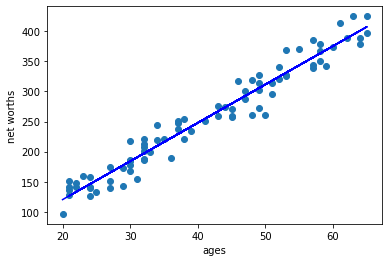

In [49]:
if cleaned_data:
    unzipped = list(zip(*cleaned_data))
    ages, net_worths, errors = unzipped
    ages = np.reshape(np.array(ages), (len(ages), 1))
    net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

    # Refit your cleaned data!

    try:
        reg.fit(ages, net_worths)

        print("➡ new slope :", reg.coef_)
        print("➡ New Score :", reg.score(ages_test, net_worths_test))

        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")

    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
else:
    print("outlier_cleaner() is returning an empty list, no refitting to be done")

## Enron Outliers

In [50]:
import sys
import pickle
import matplotlib.pyplot

sys.path.append("../utils/")

from feature_format import feature_format, target_feature_split

read in data dictionary, convert to numpy array

In [73]:
with open('../17-final-project/final_project_dataset.pkl', 'rb') as f:
    data_dict = pickle.load(f)

features = ["salary", "bonus"]

data_dict.pop('TOTAL', 0)

data = feature_format(data_dict, features)


## ↓↓↓ Your Code Goes Here ↓↓↓

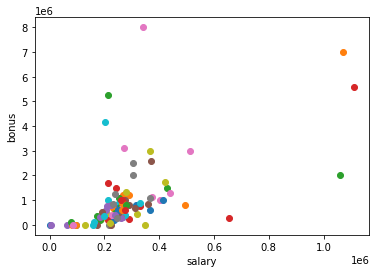

In [74]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()